The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights. You are expected to do the Market Risk Analysis using Python.

In [1]:
##
##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## lets bring in the dataset


In [2]:
##
##

from google.colab import files
uploaded = files.upload()

Saving Market+Risk+Dataset.csv to Market+Risk+Dataset.csv


## lets read the dataset and see an overview

In [3]:
##
## reading the dataframe


market1 = pd.read_csv('Market+Risk+Dataset.csv')
market1.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [4]:
##
##


market1.tail()


,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [5]:
##
##


market1.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,314.0,511.340764,135.952051,234.0,424.00,466.5,630.75,810.0
Indian Hotel,314.0,114.560510,22.509732,64.0,96.00,115.0,134.00,157.0
Mahindra & Mahindra,314.0,636.678344,102.879975,284.0,572.00,625.0,678.00,956.0
Axis Bank,314.0,540.742038,115.835569,263.0,470.50,528.0,605.25,808.0
SAIL,314.0,59.095541,15.810493,21.0,47.00,57.0,71.75,104.0
Shree Cement,314.0,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
Sun Pharma,314.0,633.468153,171.855893,338.0,478.50,614.0,785.00,1089.0
Jindal Steel,314.0,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
Idea Vodafone,314.0,53.713376,31.248985,3.0,25.25,53.0,82.00,117.0
Jet Airways,314.0,372.659236,202.262668,14.0,243.25,376.0,534.00,871.0


In [6]:
##
##


market1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [7]:
##
##


market1.size

3454

In [8]:
##
##


market1.duplicated().sum()

0

In [9]:
##
##

market1.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


## Fixing messy columns

In [10]:
##
##

market1.columns = market1.columns.str.replace(' ', '_').str.replace('.', '')

market1.head()

<ipython-input-10-0f5795f0cab6>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  market1.columns = market1.columns.str.replace(' ', '_').str.replace('.', '')


,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [11]:
##
## change the 'date' feature from object to datetime


market1['Date'] = pd.to_datetime(market1['Date'])
market1.head()

<ipython-input-11-168471033fea>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  market1['Date'] = pd.to_datetime(market1['Date'])


,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,2014-03-31,264,69,455,263,68,5543,555,298,83,278
1,2014-07-04,257,68,458,276,70,5728,610,279,84,303
2,2014-04-14,254,68,454,270,68,5649,607,279,83,280
3,2014-04-21,253,68,488,283,68,5692,604,274,83,282
4,2014-04-28,256,65,482,282,63,5582,611,238,79,243


In [12]:
##
##

market1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 314 non-null    datetime64[ns]
 1   Infosys              314 non-null    int64         
 2   Indian_Hotel         314 non-null    int64         
 3   Mahindra_&_Mahindra  314 non-null    int64         
 4   Axis_Bank            314 non-null    int64         
 5   SAIL                 314 non-null    int64         
 6   Shree_Cement         314 non-null    int64         
 7   Sun_Pharma           314 non-null    int64         
 8   Jindal_Steel         314 non-null    int64         
 9   Idea_Vodafone        314 non-null    int64         
 10  Jet_Airways          314 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 27.1 KB


In [13]:
##
## sort the 'date' feature from oldest to latest


market1.sort_values(by='Date', ascending=True, inplace = True)
market1.head()


,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
22,2014-01-09,333,92,656,404,81,8306,833,234,98,218
35,2014-01-12,394,115,603,485,79,9050,799,153,91,367
9,2014-02-06,268,89,561,364,104,7453,582,338,83,259
31,2014-03-11,396,98,577,456,80,8770,870,162,100,252
0,2014-03-31,264,69,455,263,68,5543,555,298,83,278


In [14]:
##
##


market1.reset_index(drop=True, inplace=True)
market1.head()


,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,2014-01-09,333,92,656,404,81,8306,833,234,98,218
1,2014-01-12,394,115,603,485,79,9050,799,153,91,367
2,2014-02-06,268,89,561,364,104,7453,582,338,83,259
3,2014-03-11,396,98,577,456,80,8770,870,162,100,252
4,2014-03-31,264,69,455,263,68,5543,555,298,83,278


## Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

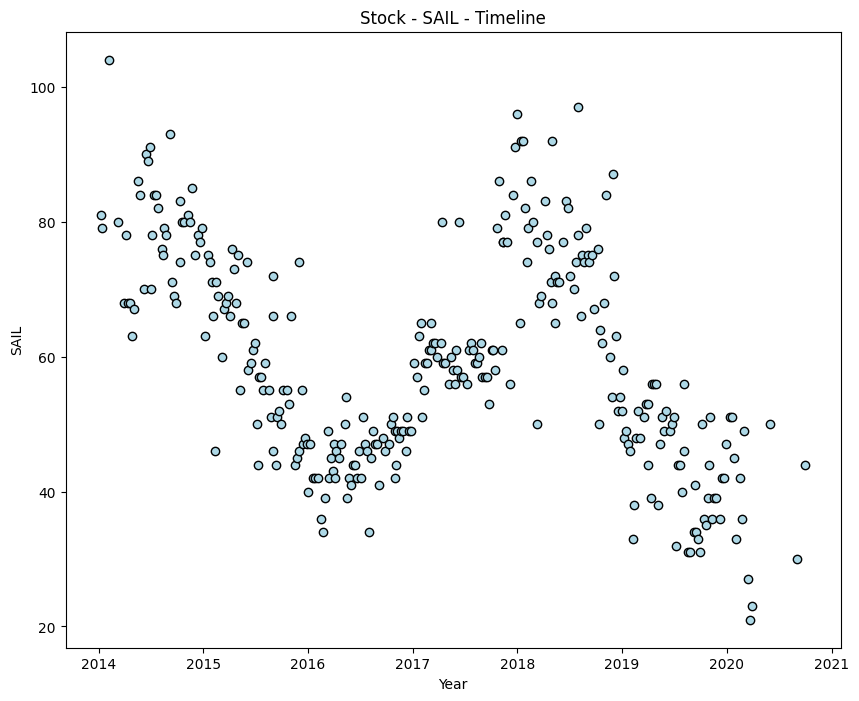

In [15]:
##
## Timeline of SAIL

plt.figure(figsize = (10, 8))
market1['Date'] = [pd.to_datetime(d) for d in market1['Date']]
plt.scatter(market1['Date'], market1['SAIL'], edgecolors='black', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.title('Stock - SAIL - Timeline')
plt.show()

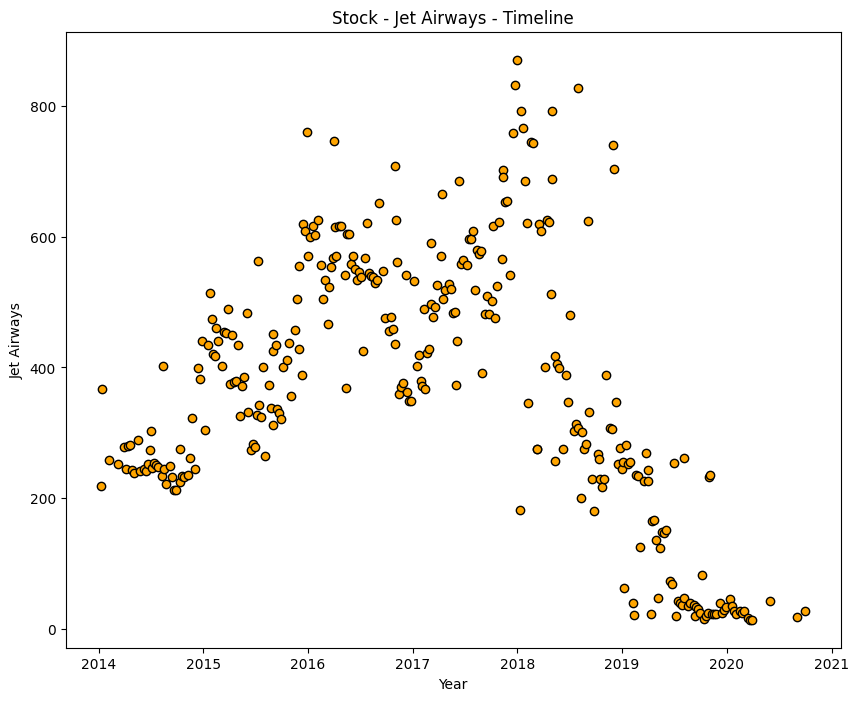

In [16]:
##
## Timeline of SAIL

plt.figure(figsize = (10, 8))
market1['Date'] = [pd.to_datetime(d) for d in market1['Date']]
plt.scatter(market1['Date'], market1['Jet_Airways'], edgecolors='black', color = 'orange')
plt.xlabel('Year')
plt.ylabel('Jet Airways')
plt.title('Stock - Jet Airways - Timeline')
plt.show()

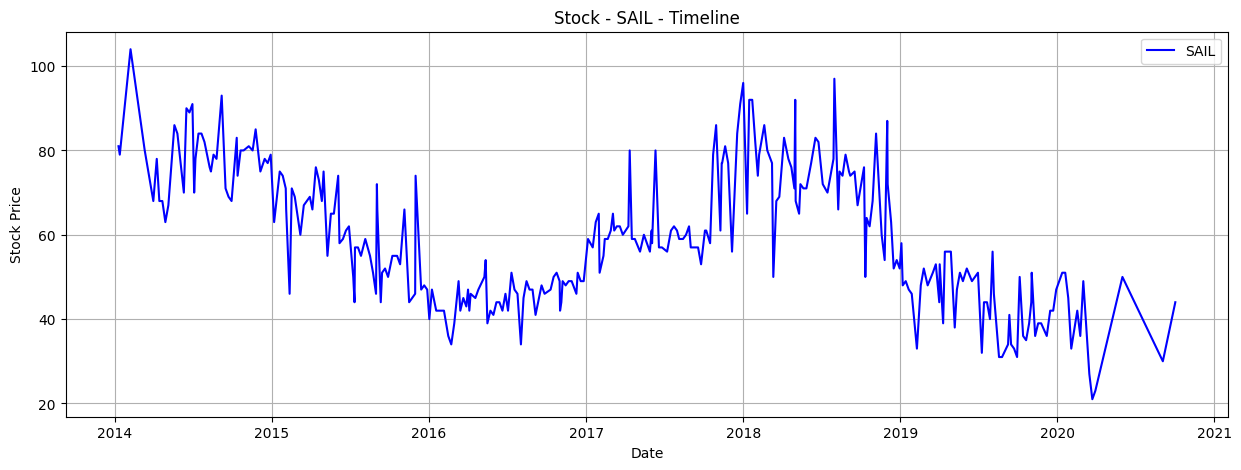

In [17]:
##
## SAIL

plt.figure(figsize = (15, 5))
plt.plot(market1['Date'], market1['SAIL'], label='SAIL', color='blue')
plt.title('Stock - SAIL - Timeline')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()
plt.show()

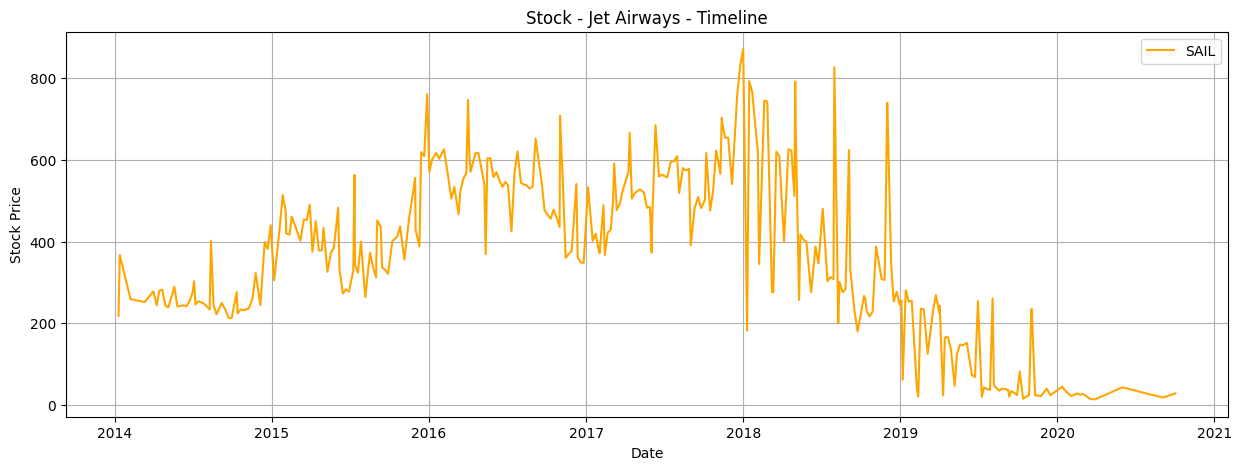

In [18]:
##
## Jet Airways

plt.figure(figsize = (15, 5))
plt.plot(market1['Date'], market1['Jet_Airways'], label='SAIL', color='orange')
plt.title('Stock - Jet Airways - Timeline')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()
plt.show()

## Returns


In [30]:
##
##

returns = np.log(market1.drop(['Date'],axis=1)).diff(axis = 0, periods = 1)

returns.head(20)

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.168208,0.223144,-0.084244,0.182734,-0.025001,0.085787,-0.041673,-0.424883,-0.074108,0.520867
2,-0.385364,-0.256296,-0.072196,-0.286995,0.274943,-0.194148,-0.316890,0.792608,-0.092019,-0.348534
3,0.390427,0.096331,0.028121,0.225339,-0.262364,0.162720,0.402023,-0.735450,0.186330,-0.027399
4,-0.405465,-0.350861,-0.237545,-0.550339,-0.162519,-0.458801,-0.449525,0.609497,-0.186330,0.098192
5,0.163844,0.135341,0.230588,0.316724,0.137201,0.246713,0.284976,-0.073076,0.124454,-0.130453
6,-0.202459,-0.149940,-0.232789,-0.290456,-0.137201,-0.227771,-0.195415,0.007194,-0.124454,0.137621
7,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
8,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
9,-0.031749,-0.015504,0.040656,0.061875,0.061558,0.011400,-0.008217,0.024898,0.012579,-0.016598


In [31]:
##
##

returns.max()

Infosys                0.406782
Indian_Hotel           0.602493
Mahindra_&_Mahindra    0.649975
Axis_Bank              0.669114
SAIL                   0.776529
Shree_Cement           0.484777
Sun_Pharma             0.402023
Jindal_Steel           0.991192
Idea_Vodafone          1.504077
Jet_Airways            2.419309
dtype: float64

In [33]:
##
##

returns.min()

Infosys               -0.494889
Indian_Hotel          -0.434664
Mahindra_&_Mahindra   -0.568918
Axis_Bank             -0.558280
SAIL                  -0.595983
Shree_Cement          -0.543639
Sun_Pharma            -0.475224
Jindal_Steel          -0.949081
Idea_Vodafone         -1.609438
Jet_Airways           -2.541602
dtype: float64

## Mean and Standard Deviation


In [20]:
##
## Means


means = returns.mean(axis = 0)
means

Infosys                0.002703
Indian_Hotel           0.001178
Mahindra_&_Mahindra   -0.000736
Axis_Bank              0.001921
SAIL                  -0.001950
Shree_Cement           0.003433
Sun_Pharma            -0.002218
Jindal_Steel          -0.000649
Idea_Vodafone         -0.011139
Jet_Airways           -0.006557
dtype: float64

In [21]:
##
## Standard Deviation


std_deviations = returns.std(axis = 0)
std_deviations

Infosys                0.104047
Indian_Hotel           0.122561
Mahindra_&_Mahindra    0.106492
Axis_Bank              0.131545
SAIL                   0.177922
Shree_Cement           0.130992
Sun_Pharma             0.124966
Jindal_Steel           0.285842
Idea_Vodafone          0.338905
Jet_Airways            0.522823
dtype: float64

In [34]:
##
## a separate dataframe


means_and_std = pd.DataFrame({'Average': means, 'Volatility': std_deviations})
means_and_std

,Average,Volatility
Infosys,0.002703,0.104047
Indian_Hotel,0.001178,0.122561
Mahindra_&_Mahindra,-0.000736,0.106492
Axis_Bank,0.001921,0.131545
SAIL,-0.001950,0.177922
Shree_Cement,0.003433,0.130992
Sun_Pharma,-0.002218,0.124966
Jindal_Steel,-0.000649,0.285842
Idea_Vodafone,-0.011139,0.338905
Jet_Airways,-0.006557,0.522823


## plotting means against standard deviations

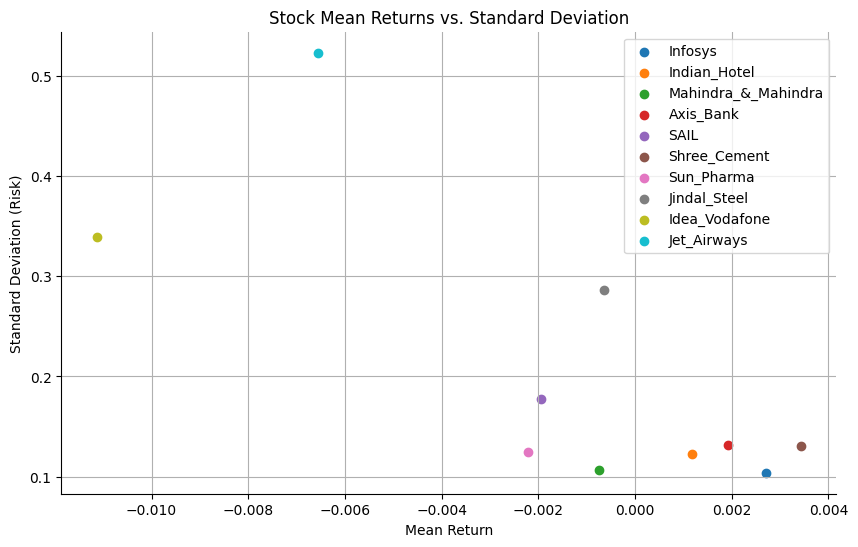

In [23]:
##
##


plt.figure(figsize=(10, 6))
for stock, mean in means.items():
    plt.scatter(mean, std_deviations[stock], label=stock)

plt.title('Stock Mean Returns vs. Standard Deviation')
plt.xlabel('Mean Return')
plt.ylabel('Standard Deviation (Risk)')
plt.legend()
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True)
plt.show()



<ipython-input-24-ee3471501211>:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([std_dev, std_dev], [mean, 0], 'k-', color='grey', linestyle='--')
<ipython-input-24-ee3471501211>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([std_dev, std_dev], [mean, 0], 'k-', color='grey', linestyle='--')
<ipython-input-24-ee3471501211>:16: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([std_dev, 0], [mean, mean], 'k-', color='grey', linestyle='--')
<ipython-input-24-ee3471501211>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argu

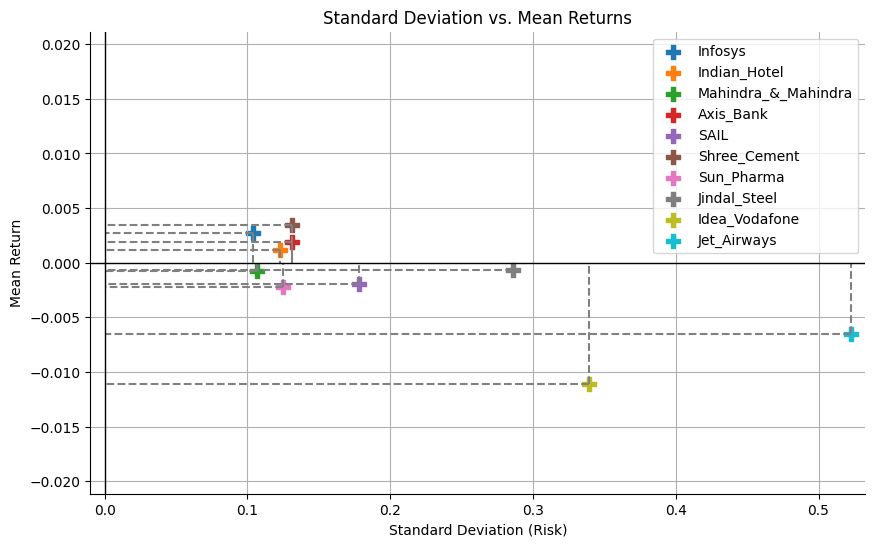

In [24]:
##
##

plt.figure(figsize=(10, 6))

## Finding max bounds for X and Y to extend the 0.0 line
max_std_dev = max(std_deviations.values)
max_mean = max(abs(mean) for mean in means.values)

## Plotting each stock with lines extending from the point to the rotated axes
for stock, mean in means.items():
    std_dev = std_deviations[stock]
    ## Draw line from point to rotated x-axis (now representing Std. Dev.)
    plt.plot([std_dev, std_dev], [mean, 0], 'k-', color='grey', linestyle='--')
    ## Draw line from point to rotated y-axis (now representing Mean Return)
    plt.plot([std_dev, 0], [mean, mean], 'k-', color='grey', linestyle='--')
    ## Plot the point
    plt.scatter(std_dev, mean, label=stock, marker = 'P', s = 100)

## Draw prominent 0.0 lines extending to bounds
plt.axhline(0, color='black', linestyle='-', linewidth=1)  # Mean return line
plt.axvline(0, color='black', linestyle='-', linewidth=1)  # Standard deviation line

plt.title('Standard Deviation vs. Mean Returns')
plt.ylabel('Mean Return')
plt.xlabel('Standard Deviation (Risk)')
plt.xlim(-0.01, max_std_dev + 0.01)  # Adjusting limits to ensure visibility of the 0.0 line
plt.ylim(-max_mean - 0.01, max_mean + 0.01)  # Adjusting limits to ensure visibility of the 0.0 line
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend()
plt.grid(True)
plt.show()
